In [20]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
# importing the dataset
dataset = pd.read_csv('Heart Attack Data Set.csv')

# split the data into inputs and outputs
x = dataset.iloc[:, [0, 1,2, 3, 4, 5, 6, 7, 8,9,10,11, 12]].values  
y = dataset.iloc[:, 13].values  # Select 'target'



In [22]:
dataset.value_counts()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 132)

x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50, random_state = 132)

print(len(x_train))
print(len(x_test))
print(len(x_valid))

242
31
30


In [24]:
# importing classifier
from sklearn.naive_bayes import GaussianNB

# initializaing the NB
classifier = GaussianNB()

# training the model
classifier.fit(x_train, y_train)

# testing the model
y_pred = classifier.predict(x_test)

In [25]:
y_pred_train = classifier.predict(x_train)
y_pred_valid = classifier.predict(x_valid)
y_pred_test= classifier.predict(x_test)

In [26]:
# importing accuracy score
from sklearn.metrics import accuracy_score
from sklearn import metrics
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
valid_acc = metrics.accuracy_score(y_valid, y_pred_valid)  #Learning Algorithm hyper-parameters Tuning
test_acc=metrics.accuracy_score(y_test,y_pred_test)
print('Training Accuracy is : \n', train_acc)
print('--------------------------------')
print('Validation Accuracy is : \n', valid_acc)
print('--------------------------------')
print('test Accuracy is : \n', test_acc)


Training Accuracy is : 
 0.8223140495867769
--------------------------------
Validation Accuracy is : 
 0.8
--------------------------------
test Accuracy is : 
 0.8387096774193549


[[15  2]
 [ 3 11]]


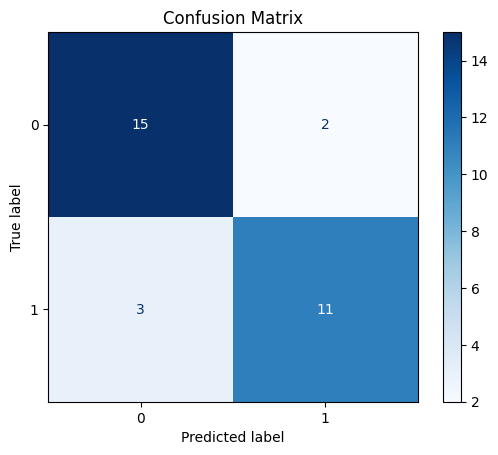

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.85      0.79      0.81        14

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



score= 0.834033613445378


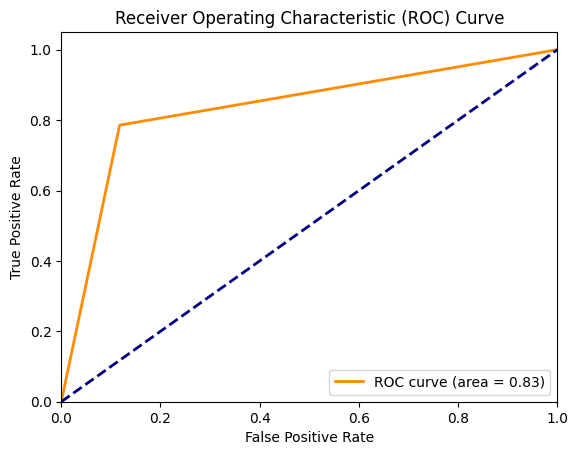

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc = roc_auc_score(y_test, y_pred_test)
print(f'score= {roc_auc}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc_value = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
#evaluation using cross validation
from sklearn.model_selection import StratifiedKFold
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []  #create empty lists to store accurcy values
for train_index, test_index in kfold.split(x, y):  #Generate indices to split data into training and test set.
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(x_train, y_train)
    y_pred_train = classifier.predict(x_train)
    y_pred_test = classifier.predict(x_test)

    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])

    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits

print("Av", "\t", ave_train_acc,"\t","\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 83.88429752066115 	 78.68852459016394
1 	 85.53719008264463 	 77.04918032786885
2 	 83.88429752066115 	 85.24590163934425
3 	 82.3045267489712 	 86.66666666666667
4 	 84.77366255144034 	 75.0
Av 	 84.07679488487568 	 	 80.53005464480874
